In [1]:
# import matplotlib.pyplot as plt 
import pandas as pd
import torch.nn as nn
import torch
# import torch.nn.functional as F
import numpy as np

In [2]:
df1 = pd.read_csv('ready_data.csv') 

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48392 entries, 0 to 48391
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pid                       48392 non-null  int64  
 1   datatime                  48392 non-null  object 
 2   sbp                       48392 non-null  float64
 3   dbp                       48392 non-null  float64
 4   temperature               48392 non-null  float64
 5   conductivity              48392 non-null  float64
 6   uf                        48392 non-null  float64
 7   blood_flow                48392 non-null  float64
 8   gender                    48392 non-null  float64
 9   birthday                  48392 non-null  float64
 10  first_dialysis            48392 non-null  object 
 11  DM                        48392 non-null  float64
 12  keyindate                 48392 non-null  object 
 13  dialysisstart             48392 non-null  object 
 14  dialys

In [4]:
df1.columns


Index(['pid', 'datatime', 'sbp', 'dbp', 'temperature', 'conductivity', 'uf',
       'blood_flow', 'gender', 'birthday', 'first_dialysis', 'DM', 'keyindate',
       'dialysisstart', 'dialysisend', 'weightstart', 'weightend', 'dryweight',
       'pulse', 'respiratory_rate', 'blood_oxygen_lvl', 'glucose_lvl',
       'hypotension', 'age', 'dialyzer', 'bath', 'technique', 'gain',
       'bath_temperature', 'replacement_Volume', 'kt', 'Bath_Flow',
       'bicarbonate_conductivity', 'arterial_Pressure', 'Venous_Pressure',
       'transmembrane_Pressure', 'avg_weekly_sessions', 'Dialysis_Duration',
       'De_hour', 'De_minutes', 'Ds_hour', 'Ds_minutes', 'session_year',
       'session_month', 'session_dayofweek', 'session_is_weekend', 'year',
       'month', 'dayofweek', 'is_weekend', 'hour', 'minutes', 'fd_year',
       'fd_month'],
      dtype='object')

In [5]:
from ydata_profiling import ProfileReport

C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
test_df= df1[
    
    ['sbp', 'dbp', 'temperature', 'conductivity', 'uf',
       'blood_flow', 'gender', 'birthday', 'DM',
        'weightstart', 'weightend', 'dryweight',
       'pulse', 'respiratory_rate', 'blood_oxygen_lvl', 'glucose_lvl',
       'hypotension', 'age', 'dialyzer', 'bath', 'technique', 'gain',
       'bath_temperature', 'replacement_Volume', 'kt', 'Bath_Flow',
       'bicarbonate_conductivity', 'arterial_Pressure', 'Venous_Pressure',
       'transmembrane_Pressure', 
        'Ds_hour', 'Ds_minutes', 'session_year',
       'session_month', 'session_dayofweek', 'session_is_weekend', 'year',
       'month', 'dayofweek', 'is_weekend', 'hour', 'minutes', 'fd_year',
       'fd_month']]
    
    
#     ['Age', 'Gender', 'Weight', 'Diabetes', 'Hypertension',
#        'Kidney Failure Cause', 'Pre-Dialysis Blood Pressure',
#        'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure',
#        'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin',
#        'Hematocrit', 'Albumin', 
#        'Dialysis Frequency (per week)', 'Dialysate Composition',
#        'Vascular Access Type', 'Dialyzer Type', 'Kt/V', 'URR',
#        'Urine Output (ml/day)', 'Dry Weight (kg)',
#        'Fluid Removal Rate (ml/hour)', 'Disease Severity']]
    
    
    
    
    
    
    

In [7]:
Y = df1['Dialysis_Duration']
# pd.DataFrame( df1['Dialysis_Duration'])

In [8]:
Y1 = df1['avg_weekly_sessions']

In [9]:
# Y["session"] = Y1

In [9]:
Y

0        240.0
1        240.0
2        240.0
3        240.0
4        240.0
         ...  
48387    240.0
48388    240.0
48389    240.0
48390    240.0
48391    240.0
Name: Dialysis_Duration, Length: 48392, dtype: float64

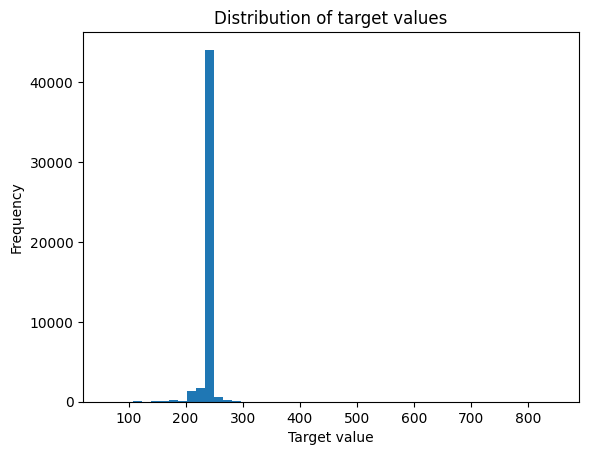

In [10]:
import matplotlib.pyplot as plt

plt.hist(Y, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


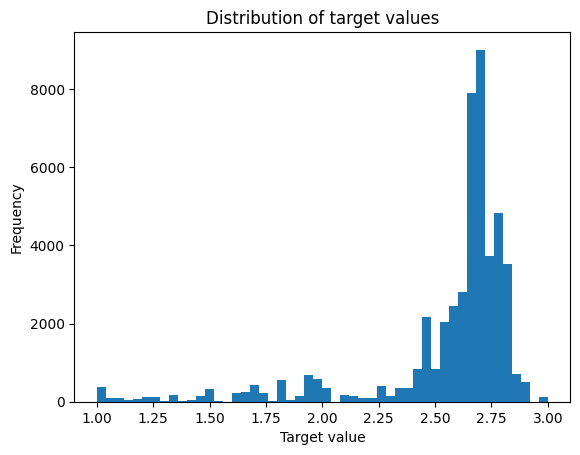

In [11]:
import matplotlib.pyplot as plt

plt.hist(Y1, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [12]:
Y.value_counts()

Dialysis_Duration
240.0    40019
210.0      837
241.0      504
242.0      420
238.0      399
         ...  
191.0        1
122.0        1
144.0        1
315.0        1
360.0        1
Name: count, Length: 129, dtype: int64

In [13]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48392 entries, 0 to 48391
Series name: Dialysis_Duration
Non-Null Count  Dtype  
--------------  -----  
48392 non-null  float64
dtypes: float64(1)
memory usage: 378.2 KB


In [14]:

# # Count the occurrences of each class (already present in Y)
# class_counts = Y.value_counts()

# # Set up the sampling strategy to ensure each class gets at least 1000 samples
# sampling_strategy = {label: max(count, 1000) for label, count in class_counts.items()}

# # Print the strategy to confirm
# print(sampling_strategy)

In [14]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

# Assume Y is the Dialysis_Duration (continuous)
# Assume average_weekly_sessions is a float series

# Step 1: Bin Dialysis_Duration
bin_edges_duration = np.linspace(Y.min(), Y.max(), num=40)  # 10 bins
Y_binned = pd.cut(Y, bins=bin_edges_duration, labels=False, include_lowest=True)

# Step 2: Bin average_weekly_sessions (you can adjust number of bins)
bin_edges_sessions = np.linspace(Y1.min(), Y1.max(), num=40)
sessions_binned = pd.cut(Y1, bins=bin_edges_sessions, labels=False, include_lowest=True)

# Step 3: Combine both binned features
combined_target = Y_binned.astype(str) + "_" + sessions_binned.astype(str)

# Step 4: Define sampling strategy — set each bin-combo to 1000 samples
sampling_strategy = {label: 50000 for label in combined_target.unique()}

# Step 5: Apply oversampling
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, combined_resampled = ros.fit_resample(test_df, combined_target)

# Step 6: Reverse the label split
resampled_df = pd.DataFrame({"combined": combined_resampled})
resampled_df[["bin_dur", "bin_sess"]] = resampled_df["combined"].str.split("_", expand=True).astype(int)

# Map back to continuous values (using bin centers)
bin_means_duration = [(bin_edges_duration[i] + bin_edges_duration[i+1]) / 2 for i in range(len(bin_edges_duration) - 1)]
bin_means_sessions = [(bin_edges_sessions[i] + bin_edges_sessions[i+1]) / 2 for i in range(len(bin_edges_sessions) - 1)]

resampled_df["Dialysis_Duration"] = resampled_df["bin_dur"].map(lambda x: bin_means_duration[x])
resampled_df["Average_Weekly_Sessions"] = resampled_df["bin_sess"].map(lambda x: bin_means_sessions[x])

# Final outputs
y_duration_resampled = resampled_df["Dialysis_Duration"]
y_sessions_resampled = resampled_df["Average_Weekly_Sessions"]


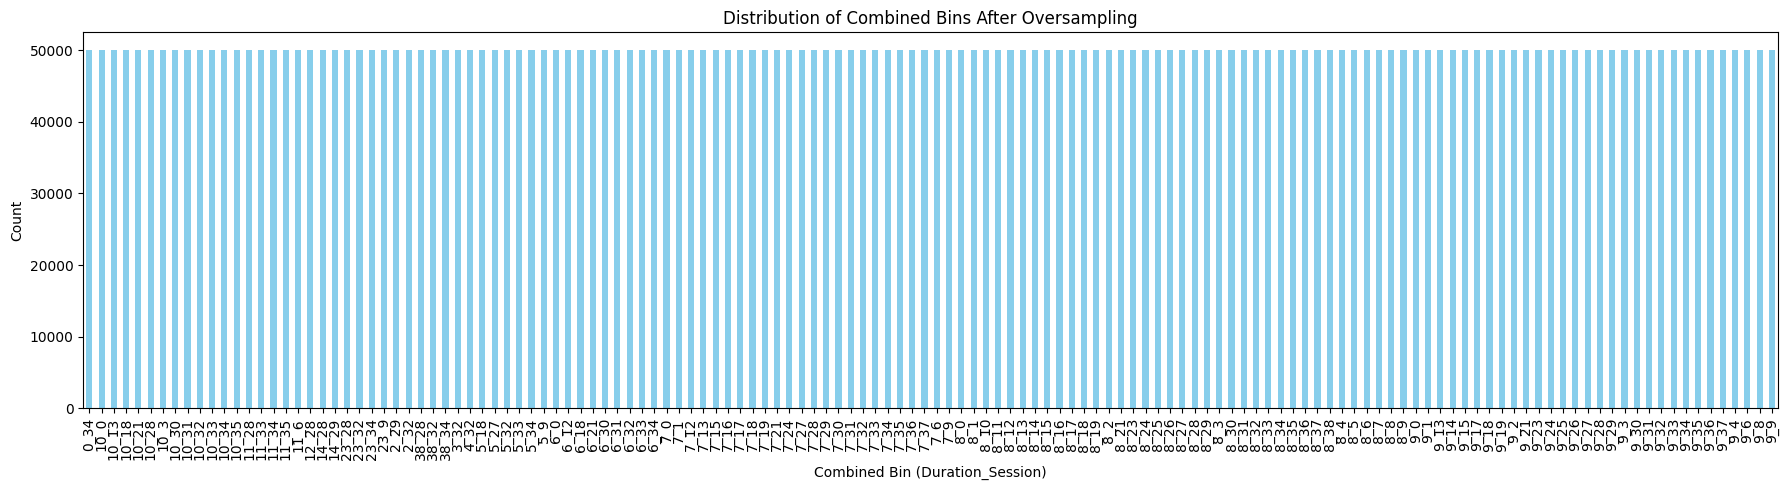

In [28]:
# Count each combined label
combined_counts = resampled_df["combined"].value_counts().sort_index()

plt.figure(figsize=(18, 5))
combined_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Combined Bins After Oversampling")
plt.xlabel("Combined Bin (Duration_Session)")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


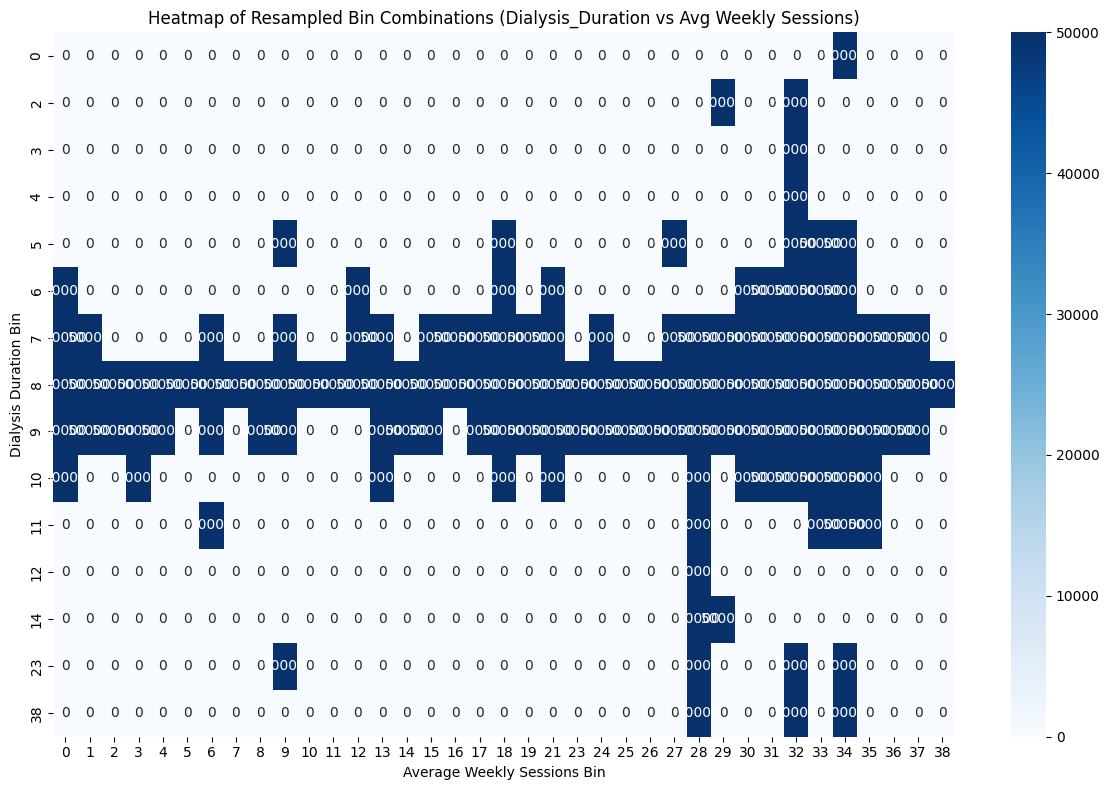

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each bin combination
pivot_table = resampled_df.pivot_table(index="bin_dur", columns="bin_sess", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d")
plt.title("Heatmap of Resampled Bin Combinations (Dialysis_Duration vs Avg Weekly Sessions)")
plt.xlabel("Average Weekly Sessions Bin")
plt.ylabel("Dialysis Duration Bin")
plt.tight_layout()
plt.show()


In [16]:
# df = X_resampled

In [17]:
# df['Dialysis_Duration'] = y_duration_resampled

In [18]:
# df['session'] = y_sessions_resampled

In [19]:
# df.Dialysis_Duration

In [20]:

# # Create the profile
# profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)

# profile.to_file("dataset_profile_cnn.html")

In [15]:
Y= pd.DataFrame( y_duration_resampled)

In [16]:
Y['session']= y_sessions_resampled

In [23]:
# X_resampled = X_resampled.drop(columns='avg_weekly_sessions')

In [17]:
Y.Dialysis_Duration.unique()

array([232.17948718, 252.43589744, 272.69230769, 211.92307692,
       171.41025641, 110.64102564, 292.94871795, 191.66666667,
       536.02564103, 839.87179487, 151.15384615, 130.8974359 ,
       353.71794872,  70.12820513, 313.20512821])

In [25]:
# X_resampled.columns

In [18]:
Y.shape

(6900000, 2)

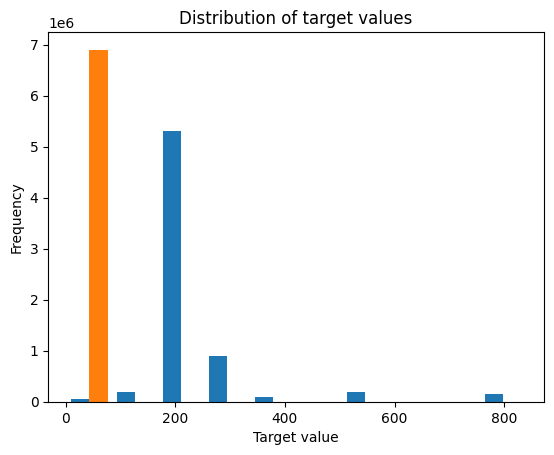

In [27]:
import matplotlib.pyplot as plt

plt.hist(Y, bins=10)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [28]:
# import numpy as np
# from sklearn.utils import resample
# import pandas as pd

# df = test_df.copy()
# df['y'] = Y
# # Bin into 5 quantiles based on the target
# df['bin'] = pd.qcut(df['y'], q=5,duplicates='drop')

# # Undersample all bins to match the smallest one
# balanced_dfs = []
# min_count = df['bin'].value_counts().min()

# for b in df['bin'].unique():
#     bin_df = df[df['bin'] == b]
#     bin_df_downsampled = resample(bin_df, replace=False, n_samples=min_count, random_state=42)
#     balanced_dfs.append(bin_df_downsampled)

# df_balanced = pd.concat(balanced_dfs).drop(columns='bin')

# # Split again into X and y
# X_balanced = df_balanced.drop(columns='y')
# y_balanced = df_balanced['y']



In [29]:
# from sklearn.utils import resample
# import pandas as pd

# # Find the size of the largest bin
# max_count = df['bin'].value_counts().max()

# # Oversample each bin to match the largest one
# balanced_dfs = []

# for b in df['bin'].unique():
#     bin_df = df[df['bin'] == b]
#     bin_df_upsampled = resample(
#         bin_df,
#         replace=True,  # oversample with replacement
#         n_samples=max_count,
#         random_state=42
#     )
#     balanced_dfs.append(bin_df_upsampled)

# # Combine and shuffle
# df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# # Final split
# X_balanced = df_balanced.drop(columns=['y', 'bin'])
# y_balanced = df_balanced['y']



In [30]:
# import numpy as np
# from sklearn.utils import resample
# import pandas as pd

# # Copy original data and add target
# df = test_df.copy()
# df['y'] = Y

# # Bin the target into quantiles (drop duplicates if needed)
# df['bin'] = pd.qcut(df['y'], q=5, duplicates='drop')

# # Determine the balancing target: mean of bin sizes
# bin_counts = df['bin'].value_counts()
# target_count = int(bin_counts.mean())  # You could also use .median()

# # Balance each bin
# balanced_dfs = []

# for b in df['bin'].unique():
#     bin_df = df[df['bin'] == b]
#     count = len(bin_df)
    
#     if count > target_count:
#         # Undersample majority bin
#         df_bal = resample(
#             bin_df,
#             replace=False,
#             n_samples=target_count,
#             random_state=42
#         )
#     elif count < target_count:
#         # Oversample minority bin
#         df_bal = resample(
#             bin_df,
#             replace=True,
#             n_samples=target_count,
#             random_state=42
#         )
#     else:
#         # Keep as-is
#         df_bal = bin_df
    
#     balanced_dfs.append(df_bal)

# # Combine and shuffle
# df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# # Final split
# X_balanced = df_balanced.drop(columns=['y', 'bin'])
# y_balanced = df_balanced['y']


In [31]:
# # Use quantile-based binning (e.g. 5 bins)
# y_binned = pd.qcut(Y, q=5, labels=False,duplicates='drop')

# # Check the number of samples per bin
# print(pd.Series(y_binned).value_counts().sort_index())


In [32]:
# X_resampled.shape

In [33]:
# Y['avg_weekly_sessions'] = X_resampled['avg_weekly_sessions']

In [34]:

# X_resampled.drop(columns=['avg_weekly_sessions'], inplace=True)

In [35]:
Y

,Dialysis_Duration,session
0,232.179487,2.717949
1,232.179487,2.717949
2,232.179487,2.717949
3,232.179487,2.717949
4,232.179487,2.717949
...,...,...
6899995,252.435897,1.487179
6899996,252.435897,1.487179
6899997,252.435897,1.487179
6899998,252.435897,1.487179


In [36]:
from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [37]:
X_train, X_test, y_train, y_test= train_test_split(
    X_resampled, Y, test_size=0.2, random_state=42
)


In [38]:
X_train.shape

(5520000, 44)

In [39]:
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import SMOTE

# # smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=3))
# # X_res, y_res = smote_enn.fit_resample(test_df, Y)


In [40]:
# bin_counts = pd.Series(y_binned_train).value_counts()
# print(bin_counts)


In [41]:
# # Make sure you're using pandas Series
# import pandas as pd

# # Assuming y_binned_train is a Series
# bin_counts = y_binned_train.value_counts()
# print(bin_counts)

# # Filter valid bins
# min_samples_per_bin = 4
# valid_bins = bin_counts[bin_counts >= min_samples_per_bin].index


In [42]:
# import numpy as np
# from collections import Counter

# print("Original:", Counter(y_binned_train))


In [43]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X_resampled, y_resampled = ros.fit_resample(X_train, y_binned_train)


In [44]:
# sm = SMOTE(k_neighbors=2, random_state=42)

# # Fit on X and binned y
# X_resampled, y_binned_resampled = sm.fit_resample(X_train, y_binned_train)

# # Use the original continuous y for training
# y_resampled = sm.fit_resample(X_train, y_train)[1]  # get actual y, not the bins


In [45]:
# plt.hist(Y, bins=50, alpha=0.5, label='Original')
# plt.hist(Y, bins=50, alpha=0.5, label='Resampled (SMOTE)', color='orange')
# plt.title("Target Distribution Before and After SMOTE")
# plt.legend()
# plt.show()


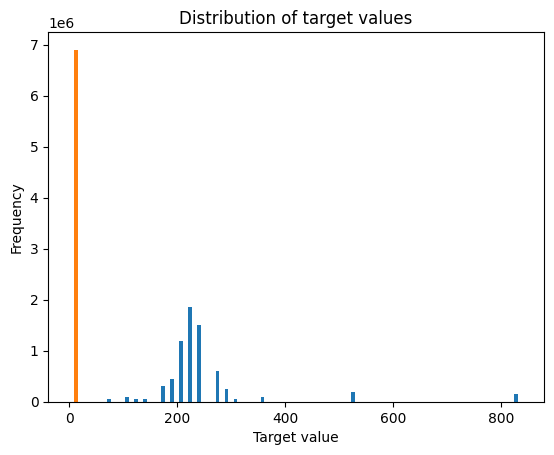

In [46]:
import matplotlib.pyplot as plt

plt.hist(Y, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [47]:
Y.session.unique()

array([2.71794872, 2.66666667, 1.69230769, 2.        , 1.17948718,
       2.41025641, 1.74358974, 2.82051282, 1.02564103, 1.48717949,
       2.76923077, 2.51282051, 2.61538462, 1.07692308, 1.79487179,
       2.25641026, 2.46153846, 1.33333333, 1.94871795, 2.35897436,
       2.30769231, 2.97435897, 1.23076923, 1.8974359 , 2.20512821,
       1.28205128, 1.58974359, 2.56410256, 1.53846154, 2.1025641 ,
       1.12820513, 1.43589744, 1.38461538, 1.64102564, 1.84615385,
       2.87179487, 2.92307692])

In [48]:
# import numpy as np
# from sklearn.utils import resample
# import pandas as pd

# # Copy original data and add target
# df = X_balanced.copy()
# df['y'] = y_balanced

# # Bin the target into quantiles (drop duplicates if needed)
# df['bin'] = pd.qcut(df['y'], q=5, duplicates='drop')

# # Determine the balancing target: mean of bin sizes
# bin_counts = df['bin'].value_counts()
# target_count = int(bin_counts.mean())  # You could also use .median()

# # Balance each bin
# balanced_dfs = []

# for b in df['bin'].unique():
#     bin_df = df[df['bin'] == b]
#     count = len(bin_df)
    
#     if count > target_count:
#         # Undersample majority bin
#         df_bal = resample(
#             bin_df,
#             replace=False,
#             n_samples=target_count,
#             random_state=42
#         )
#     elif count < target_count:
#         # Oversample minority bin
#         df_bal = resample(
#             bin_df,
#             replace=True,
#             n_samples=target_count,
#             random_state=42
#         )
#     else:
#         # Keep as-is
#         df_bal = bin_df
    
#     balanced_dfs.append(df_bal)

# # Combine and shuffle
# df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# # Final split
# X_balanced = df_balanced.drop(columns=['y', 'bin'])
# y_balanced = df_balanced['y']


In [49]:
input = X_train.shape[1]

In [50]:
input

44

In [ ]:
model = ...

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)
Y_train_scaled = scaler_y.fit_transform(y_train)
Y_val_scaled = scaler_y.transform(y_test)



In [53]:
import joblib

# Sauvegarder le modèle
joblib.dump(scaler, 'try4\scalerX.pkl')
joblib.dump(scaler_y, 'try4\scalerY.pkl')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\omarr\AppData\Local\Temp\ipykernel_23736\1303523403.py:4: SyntaxWarning: invalid escape sequence '\s'
  joblib.dump(scaler, 'try4\scalerX.pkl')
C:\Users\omarr\AppData\Local\Temp\ipykernel_23736\1303523403.py:5: SyntaxWarning: invalid escape sequence '\s'
  joblib.dump(scaler_y, 'try4\scalerY.pkl')


['try4\\scalerY.pkl']

In [ ]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),  lr=1e-5,weight_decay=1e-5)


In [55]:
print(type(X_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [56]:
y_train

,Dialysis_Duration,session
6586774,252.435897,2.820513
4872006,232.179487,2.769231
4071181,232.179487,1.897436
167583,272.692308,1.692308
3968673,232.179487,1.794872
...,...,...
4304572,232.179487,2.205128
1692743,171.410256,1.948718
6550634,252.435897,2.820513
6423388,252.435897,2.666667


In [57]:
from torch.utils.data import DataLoader, TensorDataset
# Create datasets and loaders
import torch

X_train_test = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_test = torch.tensor(Y_train_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_test, y_train_test)


X_val_test = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_test = torch.tensor(Y_val_scaled, dtype=torch.float32)

val_dataset = TensorDataset(X_val_test, y_val_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [58]:
from sklearn.metrics import mean_absolute_error, r2_score


In [85]:
import copy

epochs = 10
best_val_loss = float("inf")
patience = 5
counter = 0
best_model_wts = copy.deepcopy(model.state_dict())
history = pd.DataFrame()

train_history=[]
val_history=[]


alpha = 0.5  # weight for duration
beta = 0.5   # weight for session

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    session_train_loss=0.0
    duration_train_loss=0.0
    train_preds = []
    train_targets = []


    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        train_loss += loss.item()
        # loss = criterion(outputs, y_batch)

        session_loss = criterion(outputs[1],y_batch[1])
        duration_loss = criterion(outputs[0],y_batch[0])

        session_train_loss += session_loss.item()
        duration_train_loss += duration_loss.item()

        loss = alpha * duration_loss + beta * session_loss

        loss.backward()
        optimizer.step()





        train_preds.append(outputs.cpu())
        train_targets.append(y_batch.cpu())





    train_preds = torch.cat(train_preds).detach().numpy()
    train_targets = torch.cat(train_targets).detach().numpy()
    

    train_mae = mean_absolute_error(train_targets, train_preds)
    train_r2 = r2_score(train_targets, train_preds)

    train_history.append(train_r2)

    train_loss /= len(train_loader)
    session_train_loss /= len(train_loader)
    duration_train_loss /= len(train_loader)

    

    session_train_r2 = r2_score(train_targets[1], train_preds[1])
    session_train_mae = mean_absolute_error(train_targets[1], train_preds[1])
    
    duration_train_mae = mean_absolute_error(train_targets[0], train_preds[0])
    duration_train_r2 = r2_score(train_targets[0], train_preds[0])




    val_preds = []
    val_targets = []
    val_loss = 0.0
    session_val_loss=0.0
    duration_val_loss=0.0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            session_loss = criterion(outputs[1],y_batch[1])
            duration_loss = criterion(outputs[0],y_batch[0])
            val_loss += loss.item()
            session_val_loss += session_loss.item()
            duration_val_loss += duration_loss.item()

            val_preds.append(outputs.cpu())
            val_targets.append(y_batch.cpu())

    val_loss /= len(val_loader)
    session_val_loss /= len(val_loader)
    duration_val_loss /= len(val_loader)

    val_preds = torch.cat(val_preds).detach().numpy()
    val_targets = torch.cat(val_targets).detach().numpy()

    val_mae = mean_absolute_error(val_targets, val_preds)
    val_r2 = r2_score(val_targets, val_preds)
    
    val_history.append(val_r2)


    session_val_r2 = r2_score(val_targets[1], val_preds[1])
    session_val_mae = mean_absolute_error(val_targets[1], val_preds[1])
    
    duration_val_mae = mean_absolute_error(val_targets[0], val_preds[0])
    duration_val_r2 = r2_score(val_targets[0], val_preds[0])

    # # Evaluate
    # model.eval()
    # val_loss = 0.0
    # with torch.no_grad():
    #     for X_batch, y_batch in val_loader:
    #         outputs = model(X_batch)
    #         loss = criterion(outputs, y_batch)
    #         val_loss += loss.item()
    # val_loss /= len(val_loader)

    # print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"\n Epoch {epoch+1}, "
    f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
    f"Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}, "
    f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}"
    f"\n duration :\n"
    f"Train Loss: {duration_train_loss:.4f}, Val Loss: {duration_val_loss:.4f}, "
    f"Train MAE: {duration_train_mae:.4f}, Val MAE: {duration_val_mae:.4f}, "
    f"Train R²: {duration_train_r2:.4f}, Val R²: {duration_val_r2:.4f}" 
    f"\n session :\n"
    f"Train Loss: {session_train_loss:.4f}, Val Loss: {session_val_loss:.4f}, "
    f"Train MAE: {session_train_mae:.4f}, Val MAE: {session_val_mae:.4f}, "
    f"Train R²: {session_train_r2:.4f}, Val R²: {session_val_r2:.4f}" 
    )

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(best_model_wts)



 Epoch 1, Train Loss: 0.0586, Val Loss: 0.0583, Train MAE: 0.1601, Val MAE: 0.1602, Train R²: 0.9421, Val R²: 0.9417
 duration :
Train Loss: 0.0569, Val Loss: 0.0563, Train MAE: 0.0360, Val MAE: 0.0689, Train R²: 0.9758, Val R²: 0.9817
 session :
Train Loss: 0.0580, Val Loss: 0.0569, Train MAE: 0.1964, Val MAE: 0.2470, Train R²: 0.9328, Val R²: 0.8726

 Epoch 2, Train Loss: 0.0582, Val Loss: 0.0579, Train MAE: 0.1594, Val MAE: 0.1595, Train R²: 0.9425, Val R²: 0.9421
 duration :
Train Loss: 0.0570, Val Loss: 0.0564, Train MAE: 0.1676, Val MAE: 0.0725, Train R²: -1.8060, Val R²: 0.9833
 session :
Train Loss: 0.0579, Val Loss: 0.0561, Train MAE: 0.1495, Val MAE: 0.1503, Train R²: 0.6591, Val R²: 0.9529

 Epoch 3, Train Loss: 0.0577, Val Loss: 0.0575, Train MAE: 0.1588, Val MAE: 0.1589, Train R²: 0.9429, Val R²: 0.9425
 duration :
Train Loss: 0.0556, Val Loss: 0.0553, Train MAE: 0.0446, Val MAE: 0.2998, Train R²: 0.9974, Val R²: 0.7133
 session :
Train Loss: 0.0576, Val Loss: 0.0561, Tra

<All keys matched successfully>

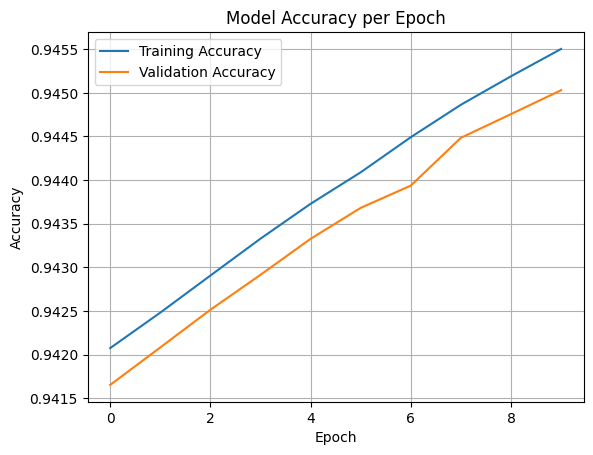

In [86]:
import matplotlib.pyplot as plt

# Suppose 'history' is the result of model.fit(...)
# e.g., history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

plt.plot(train_history, label='Training Accuracy')
plt.plot(val_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
model.eval()
with torch.no_grad():
    
    X_val_test = torch.tensor(X_val_scaled, dtype=torch.float32)
    preds = model(X_val_test).numpy()
    preds = scaler_y.inverse_transform(preds)  # Convert back to real values
    y_val_test = torch.tensor(y_test.values, dtype=torch.float32)
    actuals =y_val_test.numpy()


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(actuals, preds))
print("RMSE:", np.sqrt(mean_squared_error(actuals, preds)))
print("R² Score:", r2_score(actuals, preds))


MAE: 3.2749255
RMSE: 6.8234043
R² Score: 0.9719722270965576


In [89]:
check = actuals - preds

In [90]:
check.min()

np.float32(-354.82086)

In [91]:
check

array([[-1.6495605e+01, -2.8379202e-02],
       [ 4.8397827e+00, -6.9871664e-02],
       [ 2.4899139e+00,  1.6883957e-01],
       ...,
       [ 2.0800781e-01, -5.9890747e-03],
       [ 6.5316467e+00,  2.4035454e-02],
       [ 6.0176086e+00, -6.6946268e-02]], dtype=float32)

In [92]:
check_df = pd.DataFrame(check)

In [93]:
check_df.describe()

,0,1
count,1.380000e+06,1.380000e+06
mean,6.804603e-03,9.919499e-04
std,9.654202e+00,1.275807e-01
min,-3.548209e+02,-1.658766e+00
25%,-4.106693e+00,-2.978411e-02
50%,2.265396e-01,8.004904e-05
75%,4.712433e+00,2.833056e-02
max,9.978535e+01,1.543863e+00


In [94]:
check_df.sort_values(by=0).value_counts()

0            1        
 4.979736    -0.035623    2
-145.162643   0.009512    1
 99.785355    0.339529    1
-354.820862  -0.005212    1
-348.725891   0.006634    1
                         ..
-131.360275   0.052904    1
-131.072647   0.344955    1
-131.006729   0.318562    1
-130.660477   1.335684    1
 80.354309    0.074775    1
Name: count, Length: 1379999, dtype: int64

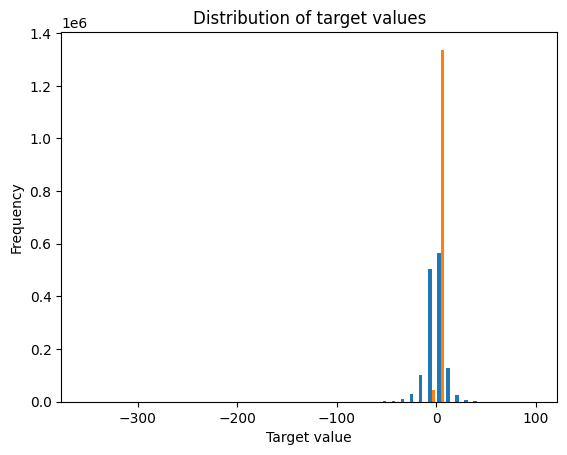

In [95]:
import matplotlib.pyplot as plt

plt.hist(check_df, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [97]:
import joblib

# Sauvegarder le modèle
joblib.dump(model, 'try4\cnn_try_data_final sampling_50k.pkl')

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\omarr\AppData\Local\Temp\ipykernel_23736\489570558.py:4: SyntaxWarning: invalid escape sequence '\c'
  joblib.dump(model, 'try4\cnn_try_data_final sampling_50k.pkl')


['try4\\cnn_try_data_final sampling_50k.pkl']